In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error as mse

In [2]:
import pandas as pd

csv_file_path = 'close.csv'

df = pd.read_csv(csv_file_path, header=None)

close = df[0].tolist()
logclose = np.log(close).tolist()
logclose_series = pd.Series(logclose)
logreturns = np.array(logclose_series.diff().dropna()).tolist()





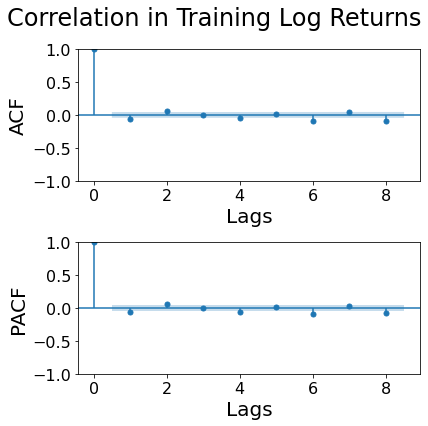

In [3]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1,figsize=(6, 6)) 

lags=np.ceil(np.log(len(logreturns)))

plot_acf(logreturns, ax=axes[0], lags=lags)  
axes[0].set_title('')
axes[0].set_xlabel('Lags', fontsize=20)
axes[0].set_ylabel('ACF', fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=16) 

plot_pacf(logreturns, ax=axes[1], lags=lags, method='ywm') 
axes[1].set_title('')
axes[1].set_xlabel('Lags', fontsize=20)
axes[1].set_ylabel('PACF', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=16) 

fig.suptitle('Correlation in Training Log Returns', fontsize=24)


plt.tight_layout()
plt.show()

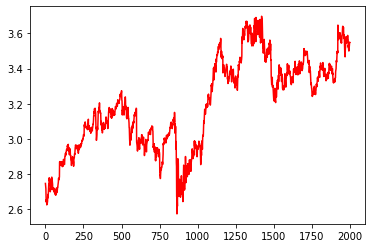

In [36]:
from math import floor

size = len(logclose)-100
close_train, close_test = close[0:size], close[size:len(close)]
logclose_train, logclose_test = logclose[0:size], logclose[size:len(logclose)]

series = logclose
train = logclose_train
test = logclose_test

plt.plot(series , color = 'r')
plt.show()


In [5]:
predicted_list, error_list = [], []
training_data = train

In [6]:
import pandas as pd

csv_file_path = 'forecasted_logclose_ARIMA_t_GARCH_t.csv'

df = pd.read_csv(csv_file_path, header=None)

predicted_list = df[0].tolist()

print(predicted_list)

[3.3431, 3.3367, 3.3245, 3.3313, 3.3399, 3.3484, 3.348, 3.3836, 3.3907, 3.3931, 3.4005, 3.4275, 3.4468, 3.4375, 3.4414, 3.4614, 3.4883, 3.4981, 3.4871, 3.4902, 3.502, 3.4917, 3.6483, 3.5986, 3.5657, 3.5666, 3.5745, 3.5898, 3.5972, 3.5898, 3.5936, 3.5931, 3.5972, 3.5711, 3.5828, 3.6054, 3.5914, 3.595, 3.5931, 3.5923, 3.5592, 3.5483, 3.5572, 3.5558, 3.5509, 3.5523, 3.546, 3.5657, 3.5685, 3.5867, 3.5876, 3.6049, 3.6213, 3.6389, 3.6417, 3.6224, 3.6162, 3.6394, 3.6312, 3.6341, 3.5917, 3.5942, 3.5884, 3.5714, 3.5873, 3.5615, 3.5194, 3.4902, 3.4893, 3.4676, 3.4984, 3.514, 3.5211, 3.5497, 3.5494, 3.5705, 3.5823, 3.5451, 3.5512, 3.5643, 3.5589, 3.5753, 3.5728, 3.5736, 3.5497, 3.5697, 3.5898, 3.5674, 3.566, 3.5393, 3.5223, 3.5329, 3.5119, 3.5089, 3.5008, 3.5074, 3.5205, 3.5402, 3.5431, 3.5515]


In [7]:
for t in range(len(test)):
    predicted_value = predicted_list[t]
    obs = test[t]
    error_list.append(obs - predicted_value)
    training_data.append(obs)
    print('predicted=%f, expected=%f error=%f' % (predicted_value, obs,abs(predicted_value-obs)))

predicted=3.343100, expected=3.335414 error=0.007686
predicted=3.336700, expected=3.323236 error=0.013464
predicted=3.324500, expected=3.330059 error=0.005559
predicted=3.331300, expected=3.338613 error=0.007313
predicted=3.339900, expected=3.347093 error=0.007193
predicted=3.348400, expected=3.346741 error=0.001659
predicted=3.348000, expected=3.382354 error=0.034354
predicted=3.383600, expected=3.389462 error=0.005862
predicted=3.390700, expected=3.391820 error=0.001120
predicted=3.393100, expected=3.399195 error=0.006095
predicted=3.400500, expected=3.426215 error=0.025715
predicted=3.427500, expected=3.445533 error=0.018033
predicted=3.446800, expected=3.436243 error=0.010557
predicted=3.437500, expected=3.440098 error=0.002598
predicted=3.441400, expected=3.460095 error=0.018695
predicted=3.461400, expected=3.487069 error=0.025669
predicted=3.488300, expected=3.496811 error=0.008511
predicted=3.498100, expected=3.485845 error=0.012255
predicted=3.487100, expected=3.488903 error=0.

In [8]:
error = mse(test, predicted_list)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


In [37]:
import pandas as pd

csv_file_path = 'rawResiduals_ARIMA_t_GARCH_t.csv'

df = pd.read_csv(csv_file_path, header=None)

training_error = np.array(df[0].tolist())

print(training_error)


[-0.0025382  -0.010937   -0.0071152  ... -0.00020205 -0.0059012
  0.0083276 ]


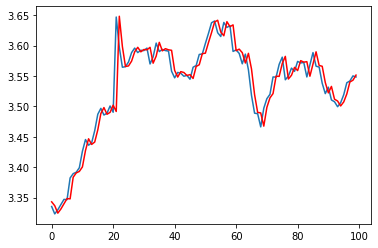

Test MSE: 0.000531


In [10]:
plt.plot(test)
plt.plot(predicted_list, color='red')
plt.show()

error = mse(test,predicted_list)
print('Test MSE: %.6f' % error)

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

In [12]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import hyperopt
import warnings

training_error = np.array(training_error).reshape(-1,1)

space = {
    "window_size": hp.choice("window_size", range(2,20)),
    "kernel": hp.choice("kernel", ["linear", "poly", "rbf"]),
    "C": hp.loguniform("C", np.log(0.001), np.log(100)),
    "epsilon": hp.loguniform("epsilon", np.log(0.00001), np.log(1)),
    "gamma": hp.choice("gamma", ["scale", "auto"]),
    "degree": hp.quniform("degree", 2, 4, 1),  
    "coef0": hp.uniform("coef0", -5, 5)      
}

def objective(params):
    window_size = params["window_size"]
    kernel = params["kernel"]
    C = params["C"]
    epsilon = params["epsilon"]

    scaler = StandardScaler()

    training_error_scaled = scaler.fit_transform(training_error)
    train_X, train_Y = [], []
    for i in range(len(training_error_scaled) - window_size):
        train_X.append(training_error_scaled[i:i+window_size])
        train_Y.append(training_error_scaled[i+window_size])
    new_train_X = np.array([x.reshape(-1) for x in train_X])
    new_train_Y = np.array(train_Y).ravel()

    svr_params = {"C": C, "epsilon": epsilon}
    
    if kernel == "poly":
        svr_params["gamma"] = params["gamma"]
        svr_params["degree"] = int(params["degree"]) 
        svr_params["coef0"] = (params["coef0"])    
    elif kernel == "rbf":
        svr_params["gamma"] = params["gamma"]

    model = SVR(kernel=kernel, **svr_params)

    tscv = TimeSeriesSplit(n_splits=2)
    score = np.mean(cross_val_score(model, new_train_X, new_train_Y, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1))
    
    return {"loss": -score, "status": STATUS_OK}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials,
            rstate=np.random.default_rng(42))

best_loss = trials.best_trial['result']['loss']
best_score = best_loss

print("\n------------------------")
print("BEST OVERALL RESULTS:")
print("------------------------")
print("Best parameters (raw indices and values):")
print(best)
print(f"Best score: {best_score:.4f}")


100%|██████████| 100/100 [00:59<00:00,  1.67trial/s, best loss: 1.17972515450106] 

------------------------
BEST OVERALL RESULTS:
------------------------
Best parameters (raw indices and values):
{'C': 1.1119131434411877, 'coef0': 2.3927241715566403, 'degree': 2.0, 'epsilon': 0.7796468179269452, 'gamma': 0, 'kernel': 0, 'window_size': 0}
Best score: 1.1797


In [13]:
from sklearn.preprocessing import RobustScaler, RobustScaler
from sklearn.svm import SVR
import numpy as np

window_sizes = range(2,20)
kernels_list = ["linear", "poly", "rbf"]
gamma_list = ["scale", "auto"]

window_size = window_sizes[best["window_size"]]
best_kernel = kernels_list[best["kernel"]]
best_gamma = gamma_list[best["gamma"]]
best_C = best["C"]
best_epsilon = best["epsilon"]
best_degree = int(best["degree"]) if best_kernel == "poly" else None
best_coef0 = (best["coef0"]) if best_kernel == "poly" else None

scaler = StandardScaler()

training_error_scaled = scaler.fit_transform(training_error)
train_X, train_Y = [], []
for i in range(0, len(training_error_scaled) - window_size):
    train_X.append(training_error_scaled[i:i+window_size])
    train_Y.append(training_error_scaled[i+window_size])

new_train_X = np.array([x.reshape(-1) for x in train_X])
new_train_Y = np.array(train_Y).ravel()

svr_params = {"C": best_C, "epsilon": best_epsilon}
if best_kernel == "poly":
    svr_params["gamma"] = best_gamma
    svr_params["degree"] = best_degree
    svr_params["coef0"] = best_coef0
elif best_kernel == "rbf":
    svr_params["gamma"] = best_gamma

model = SVR(kernel=best_kernel, **svr_params)

model.fit(new_train_X, new_train_Y)


SVR(C=1.1119131434411877, epsilon=0.7796468179269452, kernel='linear')

In [14]:
print(window_size)
print(best_kernel)
print(best_gamma)
print(best_C)
print(best_epsilon)
print(best_degree)
print(best_coef0)

2
linear
scale
1.1119131434411877
0.7796468179269452
None
None


Train MSE: 0.0004700678


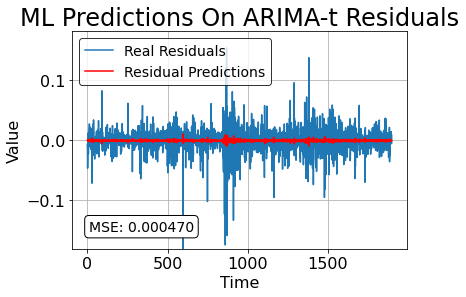

In [15]:
predictions = model.predict(new_train_X)
predictions_rescaled=scaler.inverse_transform(predictions.reshape(-1, 1))

error = mse(training_error[window_size:],predictions_rescaled)
print('Train MSE: %.10f' % error)

Y = pd.DataFrame(training_error[window_size:])
pred = pd.DataFrame(predictions_rescaled)
plt.plot(Y, label='Real Residuals')
plt.plot(pred , color = 'r', label='Residual Predictions')
plt.xlabel('Time', fontsize=16)  
plt.ylabel('Value', fontsize=16) 
plt.ylim([-0.18,0.18]) 
plt.title('ML Predictions On ARIMA-t Residuals', fontsize=24)
legend = plt.legend(loc='best', fontsize=14, frameon=True)
legend.get_frame().set_facecolor('white')  
legend.get_frame().set_edgecolor('black')  
plt.text(10, -0.15, f'MSE: {error:.6f}', fontsize=14, color='k',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()


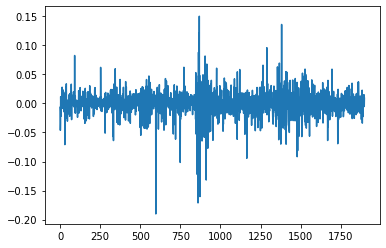

In [16]:
rawResiduals_ARIMA_t_GARCH_t_SVR = Y - pred
plt.plot(rawResiduals_ARIMA_t_GARCH_t_SVR)
plt.show()

rawResiduals_ARIMA_t_GARCH_t_SVR.to_csv('rawResiduals_ARIMA_t_GARCH_t_SVR_BO-TPE_standardscaler.csv', index=False)

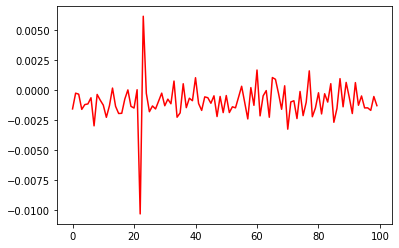

Test MSE: 0.000531


In [18]:
test_extended = training_error.tolist()[-1*window_size:] + error_list
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
        
test_data = np.array(test_data).reshape(-1,1)
test_scaled = scaler.transform(test_data)

test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)
predictions_rescaled=scaler.inverse_transform(predictions.reshape(-1, 1))


Y = pd.DataFrame(error_list)
pred = pd.DataFrame(predictions_rescaled)

plt.plot(predictions_rescaled , color = 'r')
plt.show()
error = mse(error_list,predictions_rescaled)
print('Test MSE: %.6f' % error)

Test MSE: 0.000531


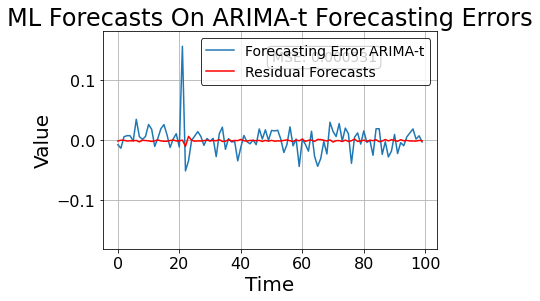

In [19]:
error = mse(error_list,predictions_rescaled)
print('Test MSE: %.6f' % error)

plt.plot(Y, label='Forecasting Error ARIMA-t')
plt.plot(pred , color = 'r', label='Residual Forecasts')
plt.xlabel('Time', fontsize=20)  
plt.ylabel('Value', fontsize=20) 
plt.ylim([-0.18,0.18])  
legend = plt.legend(loc='best', fontsize=14, frameon=True)
legend.get_frame().set_facecolor('white') 
legend.get_frame().set_edgecolor('black') 
plt.title('ML Forecasts On ARIMA-t Forecasting Errors', fontsize=24)
plt.text(50, 0.13, f'MSE: {error:.6f}', fontsize=14, color='k',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()



Hybrid Test MSE: 0.000531


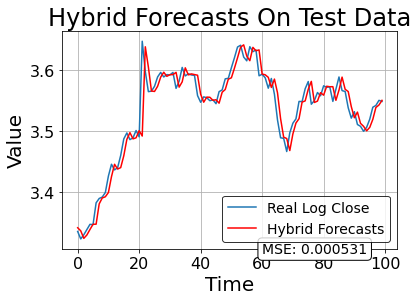

In [20]:
predicted_array = np.array(predicted_list)
final_pred = predicted_array+predictions_rescaled.flatten()
hybrid_error = mse(np.array(test), final_pred)
print('Hybrid Test MSE: %.6f' % hybrid_error)

plt.plot(pd.DataFrame(test), label="Real Log Close")
plt.plot(pd.DataFrame(final_pred), color='r', label="Hybrid Forecasts")
plt.xlabel('Time', fontsize=20)  
plt.ylabel('Value', fontsize=20)  
legend = plt.legend(loc='best', fontsize=14, frameon=True)
legend.get_frame().set_facecolor('white') 
legend.get_frame().set_edgecolor('black') 
plt.title('Hybrid Forecasts On Test Data', fontsize=24)
plt.text(60, 3.3, f'MSE: {error:.6f}', fontsize=14, color='k',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()



In [21]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from forecast_metrics import compute_error_metrics, compute_directional_metrics
print("Errors on logclose: ")
print(compute_error_metrics(test, final_pred))
print(compute_directional_metrics(test, final_pred))


Errors on logclose: 
{'NMSE': 0.09378339955604773, 'MAE': 0.01459145688655445, 'RMSE': 0.02304324441823901, 'MSE': 0.0005309911133187034, 'MAPE': 0.41153158261136846, 'TheilsU': 0.9967006250305103}
{'DA': 0.5353535353535354, 'DS': 0.5252525252525253, 'CU': 0.5964912280701754, 'CD': 0.42857142857142855}


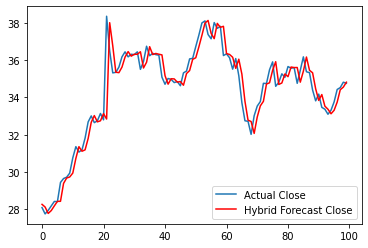

Test MSE: 0.653537


In [22]:
close_pred = np.exp(final_pred)
Y = pd.DataFrame(close_test)
pred = pd.DataFrame(close_pred)
plt.plot(Y, label="Actual Close")
plt.plot(pred , color = 'r', label="Hybrid Forecast Close")
plt.legend()
plt.show()

error = mse(close_test,close_pred)
print('Test MSE: %.6f' % error)

In [23]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from forecast_metrics import compute_error_metrics, compute_directional_metrics
print("Errors on close: ")
print(compute_error_metrics(close_test, close_pred))
print(compute_directional_metrics(close_test, close_pred))

Errors on close: 
{'NMSE': 0.10665776441447777, 'MAE': 0.5044023367436956, 'RMSE': 0.8084163523963892, 'MSE': 0.653536998821883, 'MAPE': 1.4502120594094294, 'TheilsU': 0.9965341447176884}
{'DA': 0.5353535353535354, 'DS': 0.5252525252525253, 'CU': 0.5964912280701754, 'CD': 0.42857142857142855}


Stock: 28.09 Action: Buy Portfolio: 28090.0 Stocks: 1000 Balance_init: 0 total($) 28090.0
Stock: 27.75 Action: Bought--Holding Portfolio: 27750.0 Stocks: 1000 Balance_init: 0 total($) 27750.0
Stock: 27.94 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 27940.0
Stock: 28.18 Action: Buy Portfolio: 27926.38 Stocks: 991 Balance_init: 13 total($) 27939.38
Stock: 28.42 Action: Bought--Holding Portfolio: 28164.22 Stocks: 991 Balance_init: 13 total($) 28177.22
Stock: 28.41 Action: Bought--Holding Portfolio: 28154.31 Stocks: 991 Balance_init: 13 total($) 28167.31
Stock: 29.44 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29188.04
Stock: 29.65 Action: Buy Portfolio: 29175.6 Stocks: 984 Balance_init: 12 total($) 29187.6
Stock: 29.72 Action: Bought--Holding Portfolio: 29244.48 Stocks: 984 Balance_init: 12 total($) 29256.48
Stock: 29.94 Action: Bought--Holding Portfolio: 29460.96 Stocks: 984 Balance_init: 12 total($) 29472.96
Stock: 30.76 Action: Sell Portfolio: 0 Stocks

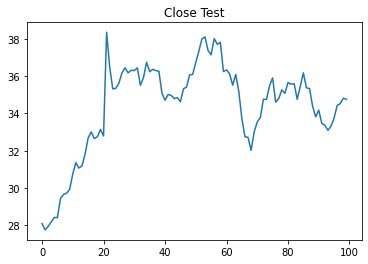

Final value of stock:
34.76


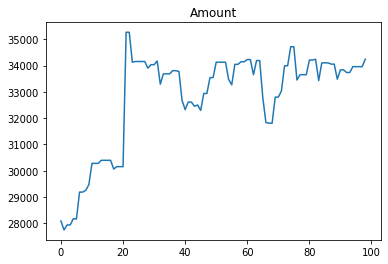

Final value of portfolio:
34242.0


In [ ]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from trading_strategies import trading_strategy1

trading_strategy1(close_test, close_pred)
            

From here on all figures that were originally in MATLAB are generated for poster presentation 

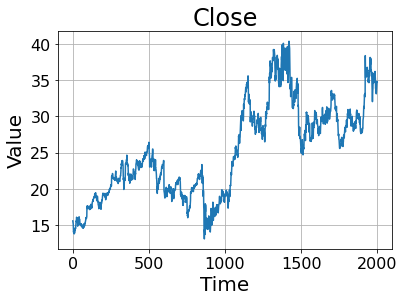

In [25]:
plt.plot(close)
plt.xlabel('Time', fontsize=20)  
plt.ylabel('Value', fontsize=20)  
plt.title('Close', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

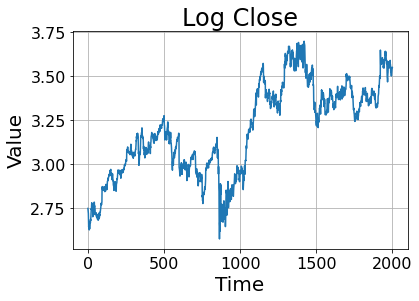

In [26]:
plt.plot(logclose)
plt.xlabel('Time', fontsize=20)  
plt.ylabel('Value', fontsize=20)  
plt.title('Log Close', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

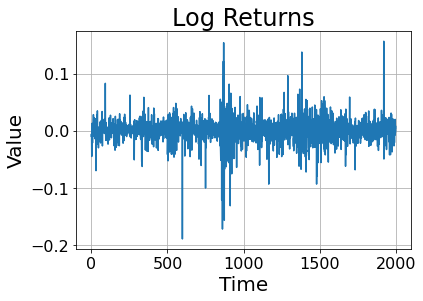

In [27]:
plt.plot(logreturns)
plt.xlabel('Time', fontsize=20)  
plt.ylabel('Value', fontsize=20)  
plt.title('Log Returns', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

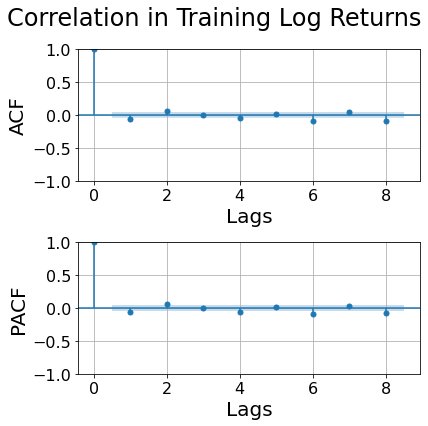

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1,figsize=(6, 6)) 

lags=np.ceil(np.log(len(logreturns)))

plot_acf(logreturns, ax=axes[0], lags=lags)  
axes[0].set_title('')
axes[0].set_xlabel('Lags', fontsize=20)
axes[0].set_ylabel('ACF', fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=16) 
axes[0].grid(True)

plot_pacf(logreturns, ax=axes[1], lags=lags, method='ywm') 
axes[1].set_title('')
axes[1].set_xlabel('Lags', fontsize=20)
axes[1].set_ylabel('PACF', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=16) 
axes[1].grid(True)

fig.suptitle('Correlation in Training Log Returns', fontsize=24)

plt.tight_layout()
plt.show()

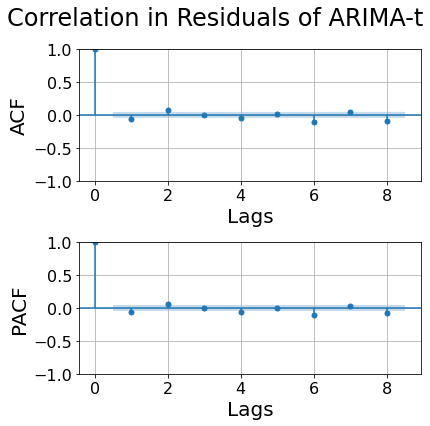

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1,figsize=(6, 6)) 

lags=np.ceil(np.log(len(training_error)))

plot_acf(training_error, ax=axes[0], lags=lags)  
axes[0].set_title('')
axes[0].set_xlabel('Lags', fontsize=20)
axes[0].set_ylabel('ACF', fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=16) 
axes[0].grid(True)

plot_pacf(training_error, ax=axes[1], lags=lags, method='ywm') 
axes[1].set_title('')
axes[1].set_xlabel('Lags', fontsize=20)
axes[1].set_ylabel('PACF', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=16) 
axes[1].grid(True)

fig.suptitle('Correlation in Residuals of ARIMA-t', fontsize=24)


plt.tight_layout()
plt.show()

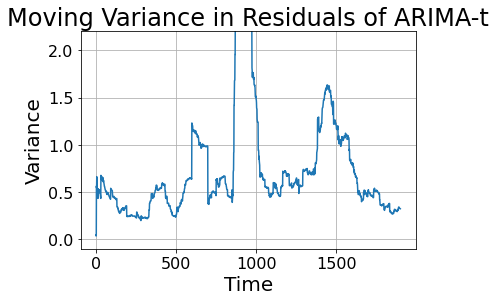

In [30]:
import pandas as pd

csv_file_path = 'stanResiduals_ARIMA_t.csv'

df = pd.read_csv(csv_file_path, header=None)

stan = np.array(df[0].tolist())

import pandas as pd
import matplotlib.pyplot as plt

stan_series = pd.Series(stan)  


window_size = 100
moving_variance = stan_series.rolling(window=window_size, min_periods=1).var()

plt.figure()
plt.plot(moving_variance)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Variance', fontsize=20)
plt.ylim([-0.1,2.2])
plt.title('Moving Variance in Residuals of ARIMA-t', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

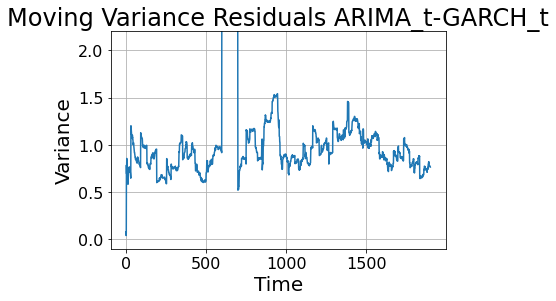

In [31]:
import pandas as pd

csv_file_path = 'stanResiduals_ARIMA_t_GARCH_t.csv'

df = pd.read_csv(csv_file_path, header=None)

stan = np.array(df[0].tolist())


import pandas as pd
import matplotlib.pyplot as plt

stan_series = pd.Series(stan)  


window_size = 100
moving_variance = stan_series.rolling(window=window_size, min_periods=1).var()

plt.figure()
plt.plot(moving_variance)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Variance', fontsize=20)
plt.ylim([-0.1,2.2])
plt.title('Moving Variance Residuals ARIMA_t-GARCH_t', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

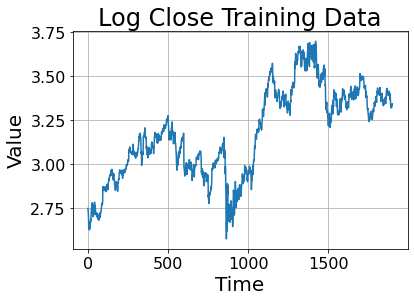

In [32]:
import pandas as pd

csv_file_path = 'train_logclose.csv'

df = pd.read_csv(csv_file_path, header=None)

train_logclose = df[0].tolist()


plt.plot(train_logclose)
plt.xlabel('Time', fontsize=20)  
plt.ylabel('Value', fontsize=20)  
plt.title('Log Close Training Data', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

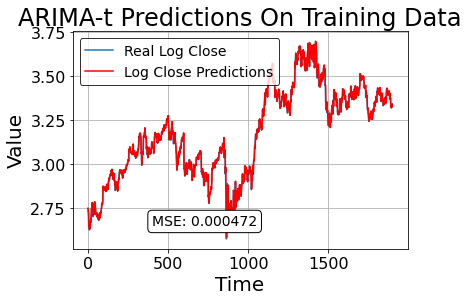

In [33]:
import pandas as pd

csv_file_path = 'rawResiduals_ARIMA_t.csv'

df = pd.read_csv(csv_file_path, header=None)

training_error = np.array(df[0].tolist())


import numpy as np
import matplotlib.pyplot as plt

train_logclose_pred = train_logclose - training_error

mse = np.mean((train_logclose - train_logclose_pred) ** 2)

plt.figure()
plt.plot(train_logclose, label='Real Log Close') 
plt.plot(train_logclose_pred, 'r', label='Log Close Predictions')  
plt.title('ARIMA-t Predictions On Training Data', fontsize=24)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Value', fontsize=20)
legend = plt.legend(loc='best', fontsize=14)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
plt.text(400, 2.65, f'MSE: {mse:.6f}', fontsize=14, color='k',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

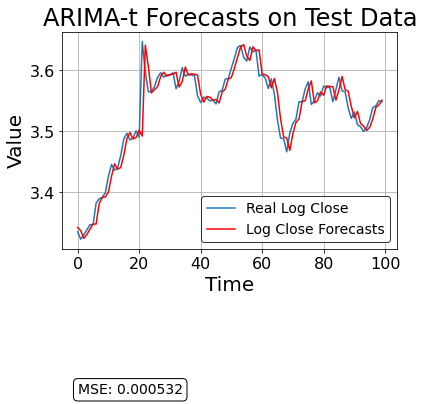

In [34]:
import pandas as pd

csv_file_path = 'forecasted_logclose_ARIMA_t.csv'

df = pd.read_csv(csv_file_path, header=None)

predicted_list = np.array(df[0].tolist())


import numpy as np
import matplotlib.pyplot as plt


mse = np.mean((logclose_test - predicted_list) ** 2)

plt.figure()
plt.plot(logclose_test, label='Real Log Close') 
plt.plot(predicted_list, 'r', label='Log Close Forecasts')  
plt.title('ARIMA-t Forecasts on Test Data', fontsize=24)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Value', fontsize=20)
legend = plt.legend(loc='best', fontsize=14)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
plt.text(0, 3.07, f'MSE: {mse:.6f}', fontsize=14, color='k',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()